<a href="https://colab.research.google.com/github/SanthoshPollai/CODSOFT/blob/CODSOFT/CodeSoft_Task_1_MovieGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Pollai Santhosh

# Code Soft Task 1 :
**MOVIE GENRE
CLASSIFICATION**

Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector
Machines

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Load the train data

In [2]:
train_data = pd.read_csv('/content/train_data.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
train_data

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
7930,7931,Fierce Light: When Spirit Meets Action (2008),documentary,Fueled by the belief that another world is po...
7931,7932,Le temple des phénix (2012),documentary,"Around the Masaya Volcano in Nicaragua, life ..."
7932,7933,"""Craigslist Therapist"" (2016)",comedy,"Facing a divorce and financial ruin, Steven W..."
7933,7934,I diafanoidi vengono da Marte (1966),sci-fi,"In the 21st century, aliens (weird, green, li..."


# Load the test data

In [3]:
test_data = pd.read_csv('/content/test_data.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'DESCRIPTION'])
test_data

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
22913,22914,On Your Marc (2017),"Follows television icon Marc Summers, the hos..."
22914,22915,The Riff Brothers (2010),Two best friends (brothers from other mothers...
22915,22916,A Battle vs. A War (2016),After a successful launch at Lone Star Colleg...
22916,22917,Follow the Leader (2002/I),The LOGO Corporation has just broken into unc...


# Load the test data solution

In [4]:
test_data_solution = pd.read_csv('/content/test_data_solution.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data_solution

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
25706,25707,Bulletproof (1988),action,A group of dangerous terrorists succeeds to g...
25707,25708,Christmas U.S.A. (1949),short,"Things spin: amusement park rides, a phonogra..."
25708,25709,A Prayer for Beslan (2005),documentary,Beslan will forever be synonymous with the mu...
25709,25710,Jack and Holly's Cosmic Stories (2011),animation,Jack and Holly take pre-schoolers and first s...


In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935 entries, 0 to 7934
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           7935 non-null   int64 
 1   TITLE        7935 non-null   object
 2   GENRE        7935 non-null   object
 3   DESCRIPTION  7935 non-null   object
dtypes: int64(1), object(3)
memory usage: 248.1+ KB
None


In [6]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22918 entries, 0 to 22917
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           22918 non-null  int64 
 1   TITLE        22918 non-null  object
 2   DESCRIPTION  22918 non-null  object
dtypes: int64(1), object(2)
memory usage: 537.3+ KB
None


In [7]:
print(train_data.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [8]:
print(test_data.isnull().sum())

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64


In [9]:
print(train_data['GENRE'].value_counts())

GENRE
drama           1967
documentary     1924
comedy          1081
short            741
horror           319
thriller         271
action           190
western          153
reality-tv       129
family           114
adventure        111
music            105
sci-fi            97
adult             96
romance           85
animation         72
sport             64
crime             63
talk-show         58
fantasy           50
mystery           49
biography         44
history           39
musical           39
game-show         31
news              23
war               20
Name: count, dtype: int64


In [10]:
# Add a new column for the length of descriptions
train_data['DESC_LENGTH'] = train_data['DESCRIPTION'].apply(lambda x: len(x.split()))
train_data

,ID,TITLE,GENRE,DESCRIPTION,DESC_LENGTH
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,92
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,32
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,114
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,192
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,106
...,...,...,...,...,...
7930,7931,Fierce Light: When Spirit Meets Action (2008),documentary,Fueled by the belief that another world is po...,81
7931,7932,Le temple des phénix (2012),documentary,"Around the Masaya Volcano in Nicaragua, life ...",138
7932,7933,"""Craigslist Therapist"" (2016)",comedy,"Facing a divorce and financial ruin, Steven W...",67
7933,7934,I diafanoidi vengono da Marte (1966),sci-fi,"In the 21st century, aliens (weird, green, li...",51


# Plot the distribution of description lengths

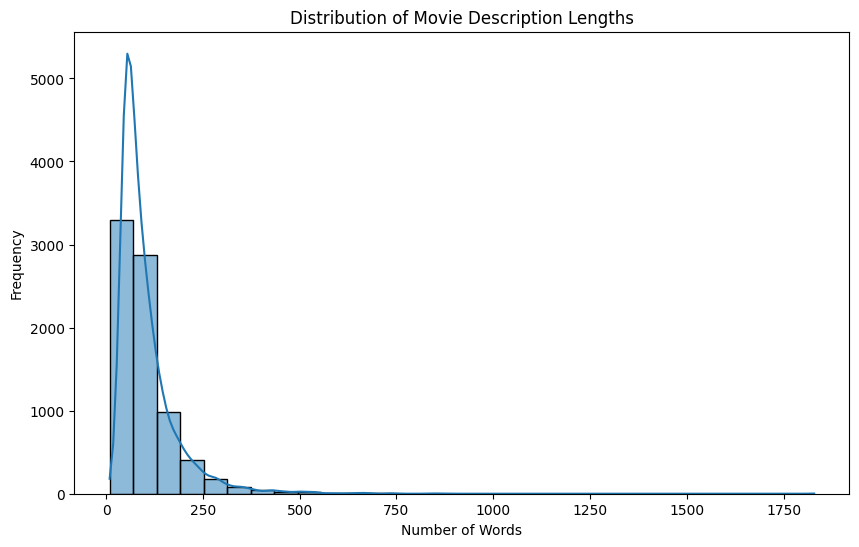

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['DESC_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Movie Description Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [12]:
# List all unique genres in the dataset
unique_genres = train_data['GENRE'].unique()
unique_genres

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

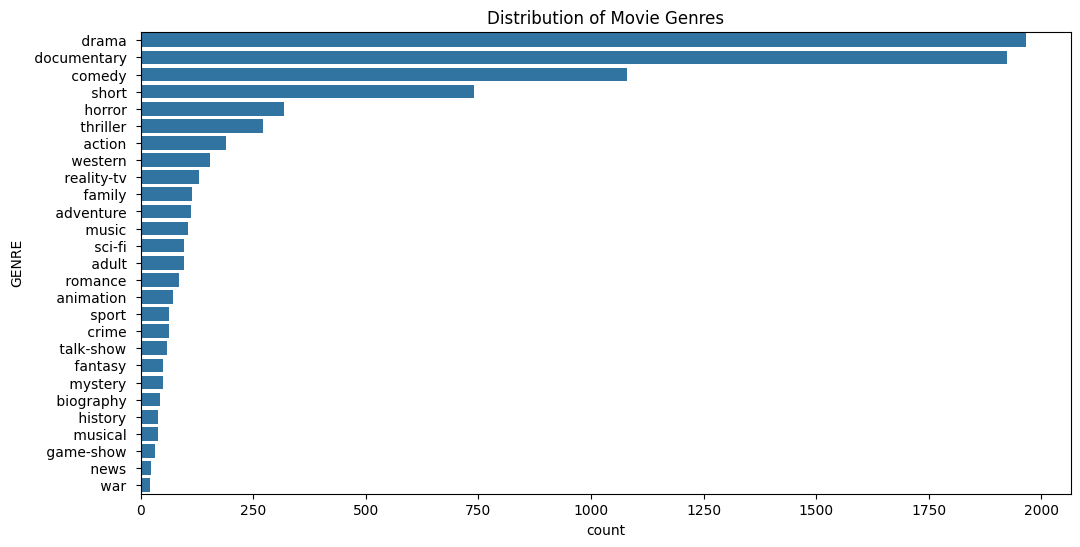

In [13]:
# Plot the distribution of genres
plt.figure(figsize=(12,6))
sns.countplot(y='GENRE', data=train_data, order=train_data['GENRE'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.show()

# Word Cloud of the top 5 Descriptions

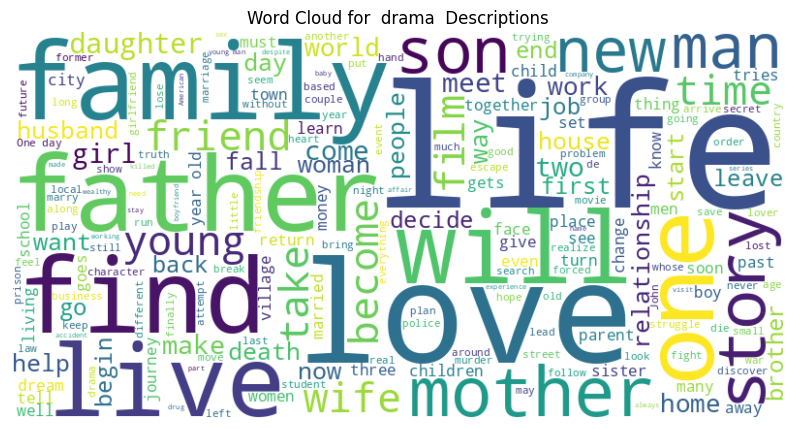

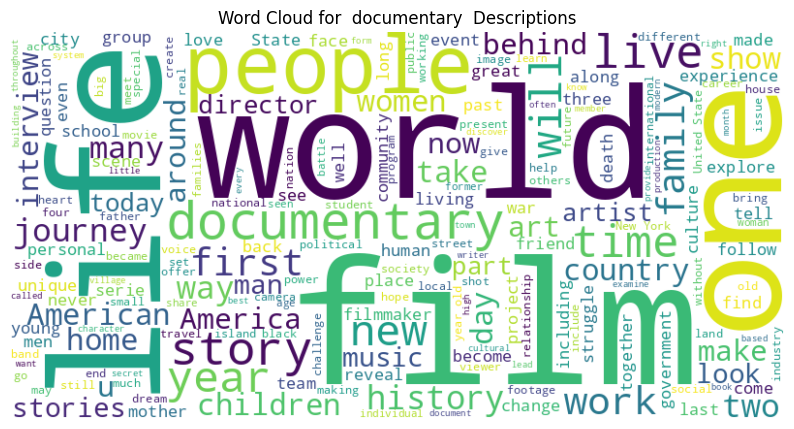

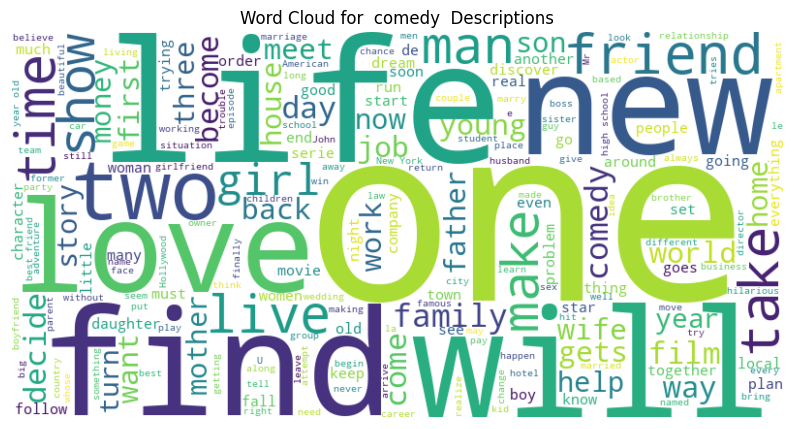

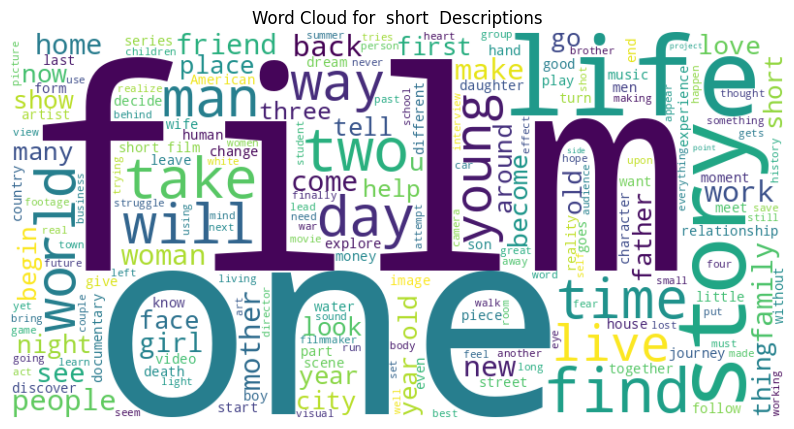

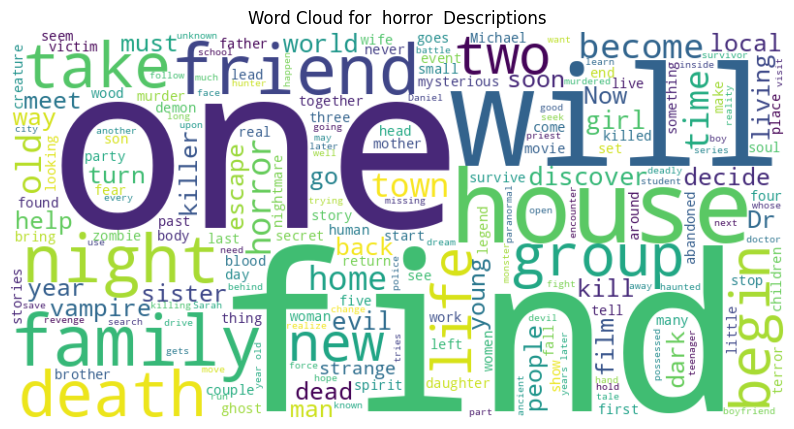

In [14]:
# Identify the top 5 most frequent genres
top_genres = train_data['GENRE'].value_counts().head(5).index

# Generate word clouds for each of the top 5 genres
for genre in top_genres:
    subset = train_data[train_data['GENRE'] == genre]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset['DESCRIPTION']))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {genre} Descriptions')
    plt.show()

# Data Preprocessing and Splitting

In [15]:
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())  # Lemmatization
    return text

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(preprocess_text)
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].apply(preprocess_text)

In [24]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=100000)

In [25]:
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])

In [26]:
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

In [27]:
# Encode the target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['GENRE'])

In [28]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Naive Bayes model

In [29]:
nb_model = MultinomialNB()
nb_model.fit(X_train_split, y_train_split)

MultinomialNB()

In [30]:
y_val_pred_nb = nb_model.predict(X_val_split)
print("Naive Bayes Model Evaluation:")
print(classification_report(y_val_split, y_val_pred_nb, target_names=encoder.classes_))
print(f'Accuracy: {accuracy_score(y_val_split, y_val_pred_nb):.4f}\n')

Naive Bayes Model Evaluation:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        38
       adult        0.00      0.00      0.00        25
   adventure        0.00      0.00      0.00        17
   animation        0.00      0.00      0.00         9
   biography        0.00      0.00      0.00         9
      comedy        0.40      0.01      0.02       223
       crime        0.00      0.00      0.00        21
 documentary        0.55      0.89      0.68       404
       drama        0.37      0.89      0.52       390
      family        0.00      0.00      0.00        21
     fantasy        0.00      0.00      0.00        15
   game-show        0.00      0.00      0.00         2
     history        0.00      0.00      0.00         6
      horror        0.00      0.00      0.00        54
       music        0.00      0.00      0.00        20
     musical        0.00      0.00      0.00         7
     mystery        0.00      0.00

# Logistic Regression model

In [31]:
lr_model = LogisticRegression()
lr_model.fit(X_train_split, y_train_split)

LogisticRegression()

In [32]:
y_val_pred_lr = lr_model.predict(X_val_split)
print("Logistic Regression Model Evaluation:")
print(classification_report(y_val_split, y_val_pred_lr, target_names=encoder.classes_))
print(f'Accuracy: {accuracy_score(y_val_split, y_val_pred_lr):.4f}\n')

Logistic Regression Model Evaluation:
               precision    recall  f1-score   support

      action        1.00      0.03      0.05        38
       adult        0.00      0.00      0.00        25
   adventure        0.00      0.00      0.00        17
   animation        0.00      0.00      0.00         9
   biography        0.00      0.00      0.00         9
      comedy        0.49      0.37      0.42       223
       crime        0.00      0.00      0.00        21
 documentary        0.57      0.88      0.69       404
       drama        0.43      0.84      0.57       390
      family        0.00      0.00      0.00        21
     fantasy        0.00      0.00      0.00        15
   game-show        0.00      0.00      0.00         2
     history        0.00      0.00      0.00         6
      horror        0.62      0.09      0.16        54
       music        0.00      0.00      0.00        20
     musical        0.00      0.00      0.00         7
     mystery        0.00  

# SVC model

In [33]:
svc_model = LinearSVC()
svc_model.fit(X_train_split, y_train_split)

LinearSVC()

In [34]:
y_val_pred_svc = svc_model.predict(X_val_split)
print("Linear SVC Model Evaluation:")
print(classification_report(y_val_split, y_val_pred_svc, target_names=encoder.classes_))
print(f'Accuracy: {accuracy_score(y_val_split, y_val_pred_svc):.4f}\n')

Linear SVC Model Evaluation:
               precision    recall  f1-score   support

      action        0.53      0.21      0.30        38
       adult        1.00      0.20      0.33        25
   adventure        0.25      0.12      0.16        17
   animation        0.00      0.00      0.00         9
   biography        0.00      0.00      0.00         9
      comedy        0.47      0.50      0.48       223
       crime        1.00      0.05      0.09        21
 documentary        0.62      0.81      0.70       404
       drama        0.49      0.70      0.58       390
      family        0.00      0.00      0.00        21
     fantasy        0.00      0.00      0.00        15
   game-show        1.00      0.50      0.67         2
     history        0.00      0.00      0.00         6
      horror        0.64      0.46      0.54        54
       music        0.57      0.20      0.30        20
     musical        0.00      0.00      0.00         7
     mystery        1.00      0.14 

# Make predictions on the test data using the Support Vector Machine Model

In [35]:
y_test_pred = svc_model.predict(X_test)

# Decode the predicted labels to genre names
y_test_pred_genres = encoder.inverse_transform(y_test_pred)

# Add predictions to the test data
test_data['PREDICTED_GENRE'] = y_test_pred_genres

# For the ID of 3, 4 and 5
ID= [3,4,5]

filtered_test_data = test_data[test_data['ID'].isin(ID)]

# Display the  3, 4 and 5th row of the test data with predictions
print(filtered_test_data [['ID', 'TITLE', 'PREDICTED_GENRE']].head())

   ID                          TITLE PREDICTED_GENRE
2   3   Off the Beaten Track (2010)     documentary 
3   4        Meu Amigo Hindu (2015)           drama 
4   5             Er nu zhai (1955)           drama 


# Comparing the test solution to the prediction

In [36]:
test_data_solution = pd.read_csv('test_data_solution.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data_solution

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


# Predict the genre of the new description

In [39]:
new_des = ("National Geographic reviews Jack Horner's research into juvenile dinosaurs. His evidence suggests that juvenile dinosaurs looked sufficiently different from adults that they have sometimes been mistaken for a separate species. The program examines specific changes that occurred as dinosaurs aged and speculates on why the changes were necessary."
                   )

In [40]:
def predict_genre(svc_model, description):
    processed_des = preprocess_text(description)
    X_input = tfidf_vectorizer.transform([processed_des])
    predicted_genre_encoded = svc_model.predict(X_input)
    predicted_genre = encoder.inverse_transform(predicted_genre_encoded)
    return predicted_genre[0]

predicted_genre = predict_genre(svc_model, new_des)
print(f"The predicted genre for the movie is: {predicted_genre}")

The predicted genre for the movie is:  comedy 


# Saving the SVC Model

In [41]:
import pickle

# Save the trained Random Forest pipeline to a file
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(svc_model, file)

In [42]:
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)